## Agrupamento em uma base de vinhos

In [1]:
from minisom import MiniSom
import pandas as pd

#### Carregar a base de dados

In [3]:
base = pd.read_csv('../../data/base de vinhos/base_vinhos.csv')

In [18]:
base[:10]

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


#### Extrair atributos previsores

In [4]:
x = base.iloc[:,1:14].values

#### Extrair atributo da classe

In [13]:
y = base.iloc[:,0].values

#### Normalização dos valores

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
normalizador = MinMaxScaler(feature_range = (0,1))
x = normalizador.fit_transform(x)

In [16]:
x

array([[0.84210526, 0.1916996 , 0.57219251, ..., 0.45528455, 0.97069597,
        0.56134094],
       [0.57105263, 0.2055336 , 0.4171123 , ..., 0.46341463, 0.78021978,
        0.55064194],
       [0.56052632, 0.3201581 , 0.70053476, ..., 0.44715447, 0.6959707 ,
        0.64693295],
       ...,
       [0.58947368, 0.69960474, 0.48128342, ..., 0.08943089, 0.10622711,
        0.39728959],
       [0.56315789, 0.36561265, 0.54010695, ..., 0.09756098, 0.12820513,
        0.40085592],
       [0.81578947, 0.66403162, 0.73796791, ..., 0.10569106, 0.12087912,
        0.20114123]])

### Construção do Mapa auto orgánizavel
- tamanho = 5 $\sqrt{N}$
- Base com 178 registros
    - tamanho = 5 $\sqrt{178}$
    - tamanho = 65,65 células
- Matriz de 8 x 8

- sigma = raio (alcance dos neurônios baseado nos neurônios escolhidos como iniciais em cada grupo)

In [19]:
som = MiniSom(x = 8, y = 8, input_len = 13,sigma = 1.0,learning_rate=0.5, random_seed = 2)

#### Inicialização dos pesos

In [20]:
som.random_weights_init(x)
som.train_random(data=x, num_iteration=100)

In [21]:
som._weights

array([[[0.70131949, 0.36337684, 0.56156797, 0.3118548 , 0.4185263 ,
         0.64764234, 0.53698623, 0.31120383, 0.45919752, 0.30532271,
         0.49349353, 0.77926949, 0.50345425],
        [0.74861809, 0.35833314, 0.59685137, 0.3564671 , 0.42000125,
         0.6253593 , 0.5346939 , 0.26475606, 0.40558847, 0.30929045,
         0.4495389 , 0.79887129, 0.52846386],
        [0.66746734, 0.25195255, 0.65024854, 0.49082793, 0.3822516 ,
         0.61557733, 0.49725028, 0.34537729, 0.41018632, 0.26970557,
         0.51639184, 0.74163887, 0.4366652 ],
        [0.54170046, 0.2382528 , 0.71513533, 0.66336169, 0.42310159,
         0.62628814, 0.52908302, 0.37463815, 0.43851813, 0.21837788,
         0.57034468, 0.7399189 , 0.34143898],
        [0.46115985, 0.18785568, 0.60341585, 0.59567604, 0.28955914,
         0.50762584, 0.41401584, 0.40600125, 0.39724966, 0.15788619,
         0.61830726, 0.64336887, 0.27236141],
        [0.3130839 , 0.18237247, 0.55562323, 0.59056626, 0.19864228,
         0.

In [22]:
som._activation_map

array([[1.01560772, 1.05313833, 1.02100585, 1.0352192 , 0.96203426,
        1.01321676, 0.93726224, 0.85173591],
       [1.06044091, 1.01780306, 0.97892247, 0.93464118, 0.92679433,
        0.98293007, 0.99959128, 0.81839552],
       [0.99891411, 0.99895891, 0.93800317, 0.87154298, 0.90950204,
        0.92567972, 0.943536  , 0.83227115],
       [1.01134155, 1.01697567, 0.99154026, 0.89684686, 0.90215515,
        0.99299267, 0.93110174, 0.88462994],
       [1.0012844 , 1.01483031, 1.00259421, 0.93350264, 1.01414887,
        1.08401493, 1.00342151, 1.03490977],
       [0.95867054, 0.96730981, 0.98554186, 0.99830594, 1.04265189,
        1.03622173, 1.04189969, 1.17724767],
       [1.01476992, 0.99994799, 1.08541318, 1.14930186, 1.10148402,
        1.00765431, 0.95793779, 0.97759854],
       [0.97883048, 1.00938649, 1.18305814, 1.2491865 , 1.15290879,
        1.02584007, 0.94901646, 0.9362365 ]])

In [25]:
q = som.activation_response(x)

In [26]:
q

array([[ 0.,  3.,  1.,  5.,  0.,  5.,  2.,  7.],
       [ 2.,  1.,  2.,  2.,  3.,  3.,  5.,  2.],
       [ 4.,  1.,  1.,  4.,  4.,  4.,  1.,  1.],
       [ 3.,  1.,  2.,  1.,  1.,  2.,  0.,  0.],
       [ 0.,  1.,  2.,  1.,  0.,  4.,  2.,  1.],
       [ 3.,  0.,  1.,  3.,  0.,  0.,  3., 45.],
       [ 1.,  1.,  1.,  1.,  5.,  3.,  0.,  0.],
       [ 6.,  0.,  3.,  7.,  2.,  1.,  1.,  7.]])

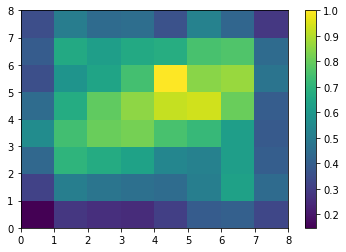

In [38]:
from pylab import pcolor, colorbar, plot
pcolor(som.distance_map().T)
colorbar()

In [32]:
w = som.winner(x[1])

In [33]:
w

(5, 2)

In [34]:
markers = ['o', 's', 'D']

In [35]:
colors = ['r', 'g', 'b']

In [36]:
y [y == 1] = 0
y [y == 2] = 1
y [y == 3] = 2

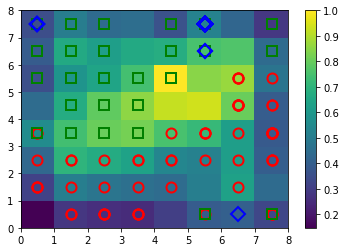

In [41]:
pcolor(som.distance_map().T)
colorbar()
for i, X in enumerate(x):
    w = som.winner(X)
    plot(w[0] + 0.5, w[1]+0.5, markers[y[i]], markerfacecolor = 'None', 
         markersize=10, markeredgecolor = colors[y[i]], markeredgewidth = 2)